<a href="https://colab.research.google.com/github/SantiagoMerlo/SI-PARCIAL-2/blob/main/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consigna Parcial
#### Se pide generar el mejor modelo que considere utilizando  una  SVM y otro basado en Redes Neuronales de Backpropagation via tensor flow:
##### Evaluar la posibilidad de definir entre tratamiento adecuado (KtVequilibrado > 1.2) del tratamiento inadecuado (KtV equilibrado <= 1.2) Debe realizar las métricsa de comparacion pertinentes y aplicar los conceptos del paper ClinicalNephr. 

### SVM

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR

### Parametros

In [ ]:
TEST_SIZE = 0.2
SEED = 2019

In [ ]:
df = pd.read_csv('urea.csv')
df

,Upre,U120,Upos,PP,UF,Ueq
0,121,63,47,94.5,2.9,51.0
1,166,87,68,59.4,1.4,71.0
2,196,68,40,61.6,1.9,42.0
3,167,73,43,45.7,2.6,43.0
4,128,64,46,54.8,1.1,46.0
...,...,...,...,...,...,...
124,196,98,79,79.0,4.0,89.0
125,160,63,35,60.0,2.0,40.0
126,142,77,50,73.0,2.0,58.0
127,181,98,69,86.0,2.0,78.0


## Entendimiento de Datos

In [ ]:
df.shape

(129, 6)

#### El dataframe tiene 129 rows y 6 atributos. El evento es la medicion de sangre del paciente. 

In [ ]:
columns = df.columns
columns.to_list()

['Upre', 'U120', 'Upos', 'PP', 'UF', 'Ueq']

## Diccionario del Negocio

Upre : Concentración de Urea inicial al tratamiento (tiempo 0)

U120: Concentración de Urea a la mitad del tratamiento (tiempo 120)

Upos : Concentracón de Urea al finalizar el tratamiento (tiempo 240 o Urea post) 

PP : Peso incial del paciente

UF : Pérdida de peso al finalizar el tratamiento.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Upre    129 non-null    int64  
 1   U120    129 non-null    int64  
 2   Upos    129 non-null    int64  
 3   PP      129 non-null    float64
 4   UF      129 non-null    float64
 5   Ueq     129 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 6.2 KB


#### Los atributos son variables numericas continuas. 

In [ ]:
df.describe()

,Upre,U120,Upos,PP,UF,Ueq
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,147.992248,79.589147,55.000000,72.946512,2.743411,61.841085
std,35.103752,24.080793,18.391149,17.507936,1.182017,20.065516
min,59.000000,28.000000,21.000000,39.000000,0.000000,20.000000
25%,124.000000,64.000000,40.000000,60.000000,2.000000,48.500000
50%,146.000000,77.000000,50.000000,72.600000,2.700000,59.000000
75%,166.000000,96.000000,68.000000,85.300000,3.400000,76.000000
max,247.000000,144.000000,98.000000,119.000000,6.000000,112.000000


In [ ]:
description = df.describe().loc[['mean', 'std', 'min', 'max']]
description

,Upre,U120,Upos,PP,UF,Ueq
mean,147.992248,79.589147,55.000000,72.946512,2.743411,61.841085
std,35.103752,24.080793,18.391149,17.507936,1.182017,20.065516
min,59.000000,28.000000,21.000000,39.000000,0.000000,20.000000
max,247.000000,144.000000,98.000000,119.000000,6.000000,112.000000


In [ ]:
for column in df.iteritems():
    ranges_list = description.loc['max'] - description.loc['min'] 
ranges_list

Upre    188.0
U120    116.0
Upos     77.0
PP       80.0
UF        6.0
Ueq      92.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

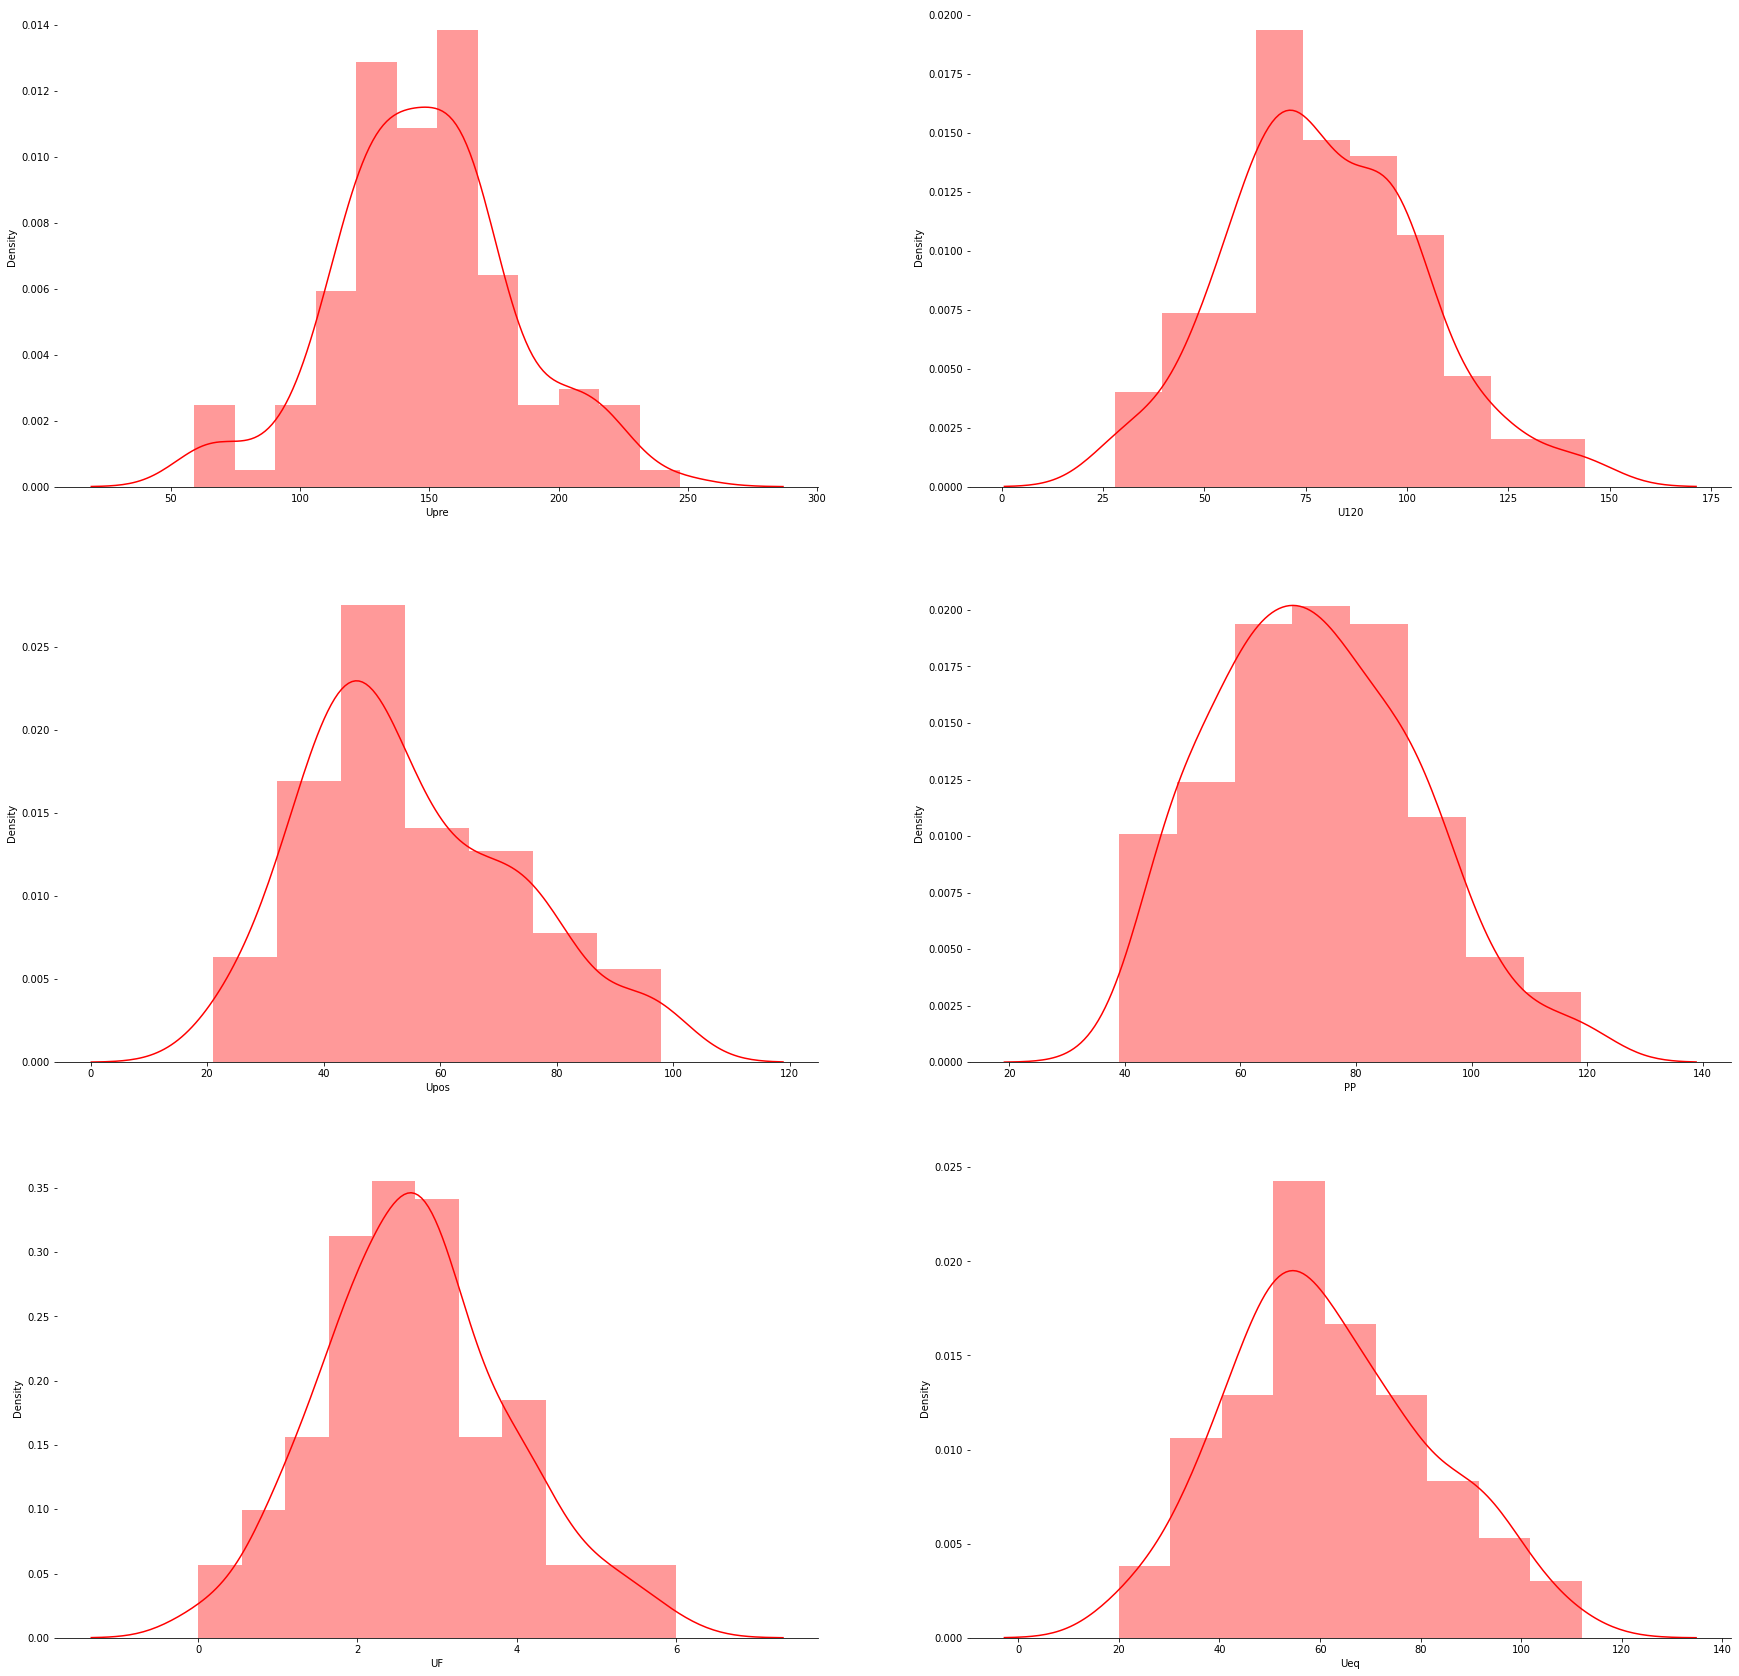

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(30, 30), sharex=False)
sns.despine(left=True)

sns.distplot(df['Upre'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[0, 0])

sns.distplot(df['U120'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[0, 1])

sns.distplot(df['Upos'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[1, 0])

sns.distplot(df['PP'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[1, 1])

sns.distplot(df['UF'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[2, 0])

sns.distplot(df['Ueq'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[2, 1])

plt.show()

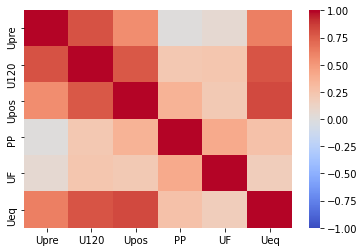

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

### Valores Nan

In [ ]:
df.isna().sum()

Upre    0
U120    0
Upos    0
PP      0
UF      0
Ueq     0
dtype: int64

#### Por suerte no hay valores nulos en la base de datos. 

### Outliers



def plot_oultiers(data, mascaras):
    
    classes = sorted(np.unique(y_data))
    f, ax = plt.subplots(1,1, figsize=(12, 4))
    g = sns.boxplot(data=rating_zscore_df[mascara_3_sigmas])
    g.set_title('Rating Z-Score con 3 sigmas')
    
    for p, label in zip(g.patches, classes):
        g.annotate(LABELS[label], (p.get_x(), p.get_height() + 0.2))
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


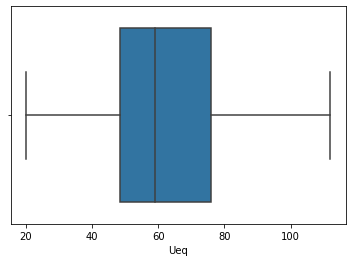

In [ ]:
sns.boxplot(df['Ueq'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


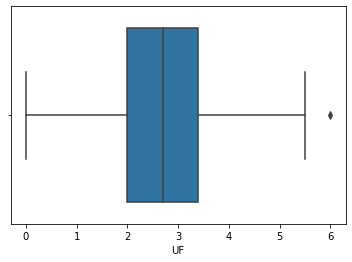

In [ ]:
sns.boxplot(df['UF'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


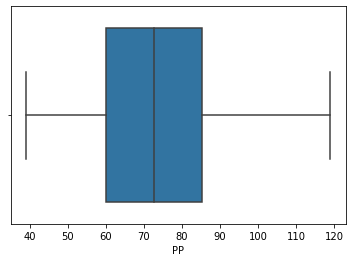

In [ ]:
sns.boxplot(df['PP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


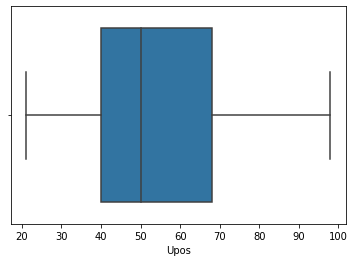

In [ ]:
sns.boxplot(df['Upos'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


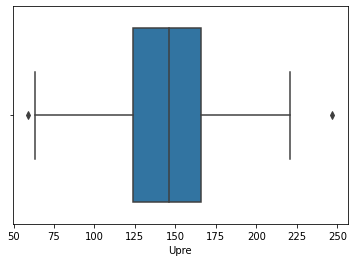

In [ ]:
sns.boxplot(df['Upre'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


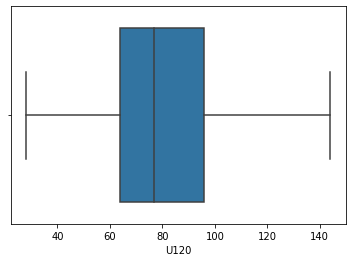

In [ ]:
sns.boxplot(df['U120'])

#### Vamos a corregir los outliers

In [ ]:
scaler = StandardScaler()

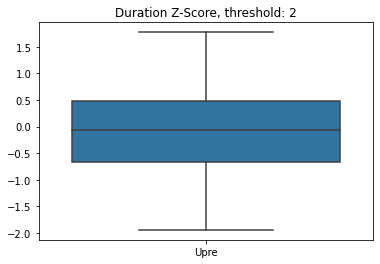

0      2.9
1      1.4
2      1.9
3      2.6
4      1.1
      ... 
124    4.0
125    2.0
126    2.0
127    2.0
128    1.2
Name: UF, Length: 129, dtype: float64

In [ ]:
# Aprendemos sobre nuestros datos, no olvidemos el reshape!
scaler.fit(df['Upre'].values.reshape(-1, 1))

# Ahora transformamos los datos
duration_zscore = scaler.transform(df['Upre'].values.reshape(-1, 1))

# Guardemoslo en un dataframe
duration_zscore_df = pd.DataFrame(duration_zscore, columns=['Upre'])

# Y si filtramos con las tablas de z-score
# Si filtramos aquellos valores mayores a 2, estamos considerando el 99% de la distribucion
mascara_z_score = np.abs(duration_zscore_df) < 2
sns.boxplot(data=duration_zscore_df[mascara_z_score]).set_title('Duration Z-Score, threshold: 2')
plt.show()

df['UF']

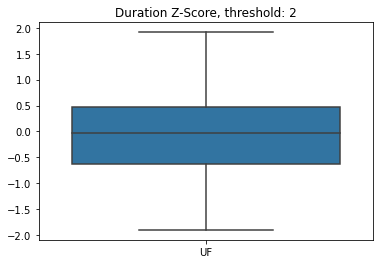

In [ ]:
scaler.fit(df['UF'].values.reshape(-1, 1))

# Ahora transformamos los datos
duration_zscore = scaler.transform(df['UF'].values.reshape(-1, 1))

# Guardemoslo en un dataframe
duration_zscore_df = pd.DataFrame(duration_zscore, columns=['UF'])

# Y si filtramos con las tablas de z-score
# Si filtramos aquellos valores mayores a 2, estamos considerando el 99% de la distribucion
mascara_z_score = np.abs(duration_zscore_df) < 2
sns.boxplot(data=duration_zscore_df[mascara_z_score]).set_title('Duration Z-Score, threshold: 2')
plt.show()

## Hay que escalar con MaxMin?

### Preprocesing data

In [ ]:
X, Y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)

print('Tamaño X_train: {}'.format(X_train.shape))
print('Tamaño Y_train: {}'.format(Y_train.shape))
print('Tamaño X_test: {}'.format(X_test.shape))
print('Tamaño Y_test: {}'.format(Y_test.shape))

Tamaño X_train: (103, 5)
Tamaño Y_train: (103,)
Tamaño X_test: (26, 5)
Tamaño Y_test: (26,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelo

In [ ]:
model = SVR()
model.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Obtengamos predicciones para el conjunto de test
train_y_pred = model.predict(X_train)
train_acc = accuracy_score(Y_train, train_y_pred)
print('+ Accuracy en train: {:.4f}'.format(train_acc))
test_y_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test, test_y_pred)
print('+ Accuracy en test: {:.4f}'.format(test_acc))

NameError: ignored

In [ ]:
# Definimos un conjunto de paremetros a combinar y usar
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

# Creamos el modelo para probarlos
tuned_model = GridSearchCV(SVC(C=1),          # Clasificador base
                           tuned_parameters,  # Parametros a probar
                           cv=5,              # 5-fold cross validation
                           scoring='accuracy')

# Se entrenara utilizando 5-fold cross validation en el conjunto de entrenamiento
tuned_model.fit(X_train, Y_train)

print('Mejores parametros: {}'.format(tuned_model.best_params_))
print('Accuracy: {:.4f}'.format(tuned_model.best_score_))

In [ ]:
# Entrenamos el modelo final con los parametros obtenidos
model = SVC(C=10, gamma=0.01, kernel='rbf')
model.fit(X_train, Y_train)

# Evaluamos los resultados
test_y_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test, test_y_pred)
print('+ Accuracy en test: {:.4f}'.format(test_acc))